In [1]:
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

In [2]:
library('tm')
library('ldatuning')
library('topicmodels')
library('magrittr')
# library('multidplyr')

Loading required package: NLP
Warning message:
“package ‘magrittr’ was built under R version 3.4.2”

## Peparing Corpus

In [6]:
docs <- scan(file = '../data/fullpub/combined_toks.txt', character(), sep = '\n')

In [7]:
docs[1]

[1] "ballooning stability analysis jet hmode discharge previous study stability large aspect ratio model equilibrium ideal mhd ballooning mode shown across bulk plasma exist two marginally stable value pressure gradient parameter define unstable zone separate first small stable region second large stable region close separatrix however first second region coalesce surface averaged current density exceeds critical value plasma region stable ballooning mode value pressure gradient paper extend result jet mode equilibrium using finite aspect ratio ballooning formalism ass relevance ideal ballooning stability discharge particular analyse shot time sec phase proceeding 16th european conference controlled fusion plasma physic european_conference"

In [8]:
corpus <- Corpus(VectorSource(docs))

In [9]:
# Create a document-term matrix for LDA
dtm <- DocumentTermMatrix(corpus)

In [10]:
dtm

<<DocumentTermMatrix (documents: 8867, terms: 26244)>>
Non-/sparse entries: 518644/232186904
Sparsity           : 100%
Maximal term length: 41
Weighting          : term frequency (tf)

## Finding number of topics:

Using RScript to run instead of from jupyter notebook, as it takes very long compute time! 

script located [here](../src)

In [ ]:
control_list_gibbs <- list(
  burnin = 1000,
  iter = 2000,
  seed = 0:4,
  nstart = 5,
  best = TRUE
)

In [ ]:
# Searching for the number of topics
system.time(
  topic_number <- FindTopicsNumber(
    dtm,
    topics = c(seq(5,10,1), seq(12, 20, 2), seq(25, 50, 5)),
    metrics = c( "Griffiths2004", "CaoJuan2009", "Arun2010", "Deveaud2014"),
    method = "Gibbs",
    control = control_list_gibbs,
    mc.cores = 40L,
    verbose = TRUE
  )
)

### Visualise different metrics:

Using the plotting function in `ldatuning`

In [3]:
tm1 <- load('../src/res/tuning.topic_number.rdata')
tm2 <- load('../src/res/tuning.topic_number2.rdata')
print(c(tm1,tm2))

[1] "topic_number"  "topic_number2"


In [4]:
topic_number

topics,Griffiths2004,CaoJuan2009,Arun2010,Deveaud2014
5,-5682676,0.18603875,14902.744,2.597773
6,-5605135,0.15890029,14475.368,2.614030
7,-5523768,0.14557740,14121.137,2.680473
8,-5459774,0.13420091,13774.957,2.688589
9,-5404150,0.12797767,13568.253,2.716940
10,-5359914,0.11282653,13285.166,2.703158
12,-5278835,0.09375132,12839.992,2.754645
14,-5220615,0.09816342,12568.100,2.737206
16,-5165167,0.09009443,12245.949,2.727204
18,-5101420,0.07912356,12006.317,2.752504


In [8]:
topic_number2

topics,Griffiths2004,CaoJuan2009,Arun2010,Deveaud2014
60,-4613587,0.02144282,9153.749,2.591542
70,-4585555,0.01947819,8876.824,2.504680
80,-4570630,0.01834712,8627.480,2.411917
90,-4542534,0.01634209,8391.698,2.346231
100,-4544313,0.01687175,8251.357,2.264914


In [5]:
all_models <- rbind(topic_number, topic_number2)

In [13]:
pdf('plot.pdf')

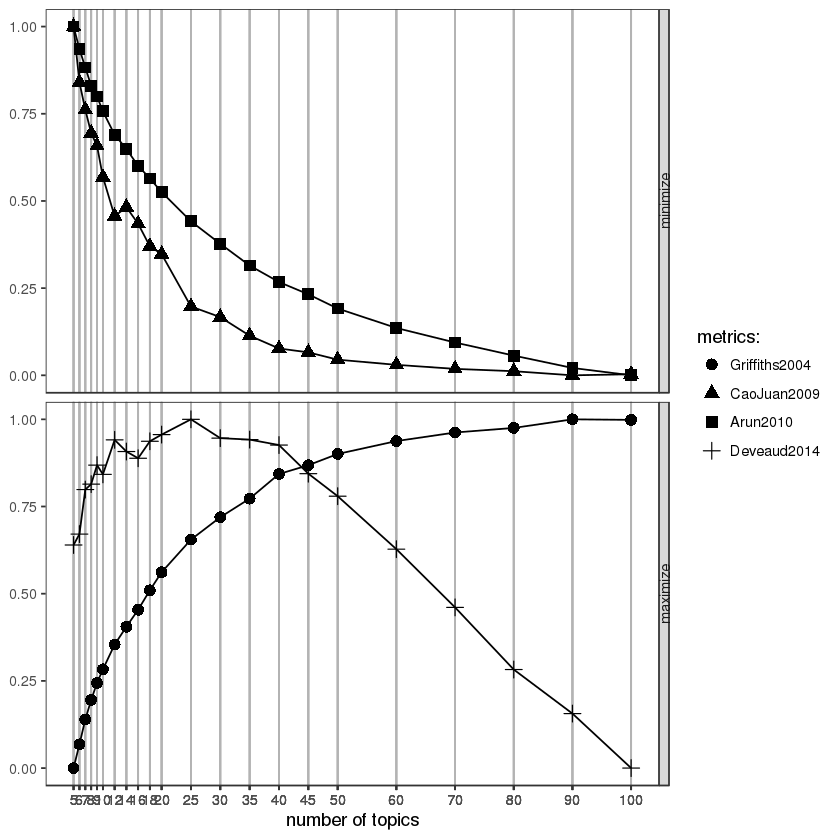

In [14]:
plt <- FindTopicsNumber_plot(all_models)

In [15]:
print(plt)

NULL


In [16]:
dev.off()

pdf 
  3

## CTM

In [1]:
control_list_ctm <- list(
  seed = 5:9,
  nstart = 5,
  best = TRUE
)

In [8]:
ctm_20 <-CTM(k=20, x=dtm, control=control_list_ctm)

ERROR: Error in is(x, "DocumentTermMatrix"): object 'dtm' not found
